In [21]:
import sys
sys.path.append(r"C:\cs229-journey\cs229-journey")

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import problem_sets.PS1.src.util as util

from problem_sets.PS1.src.linear_model import LinearModel

In [23]:
ds5_training_set_path = 'data/ds5_train.csv'
ds5_valid_set_path = 'data/ds5_valid.csv'
ds5_test_set_path = 'data/ds5_test.csv'

In [24]:
x_train, y_train = util.load_dataset(ds5_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds5_valid_set_path, add_intercept=True)
x_test, y_test = util.load_dataset(ds5_test_set_path, add_intercept=True)

We have a look to the data

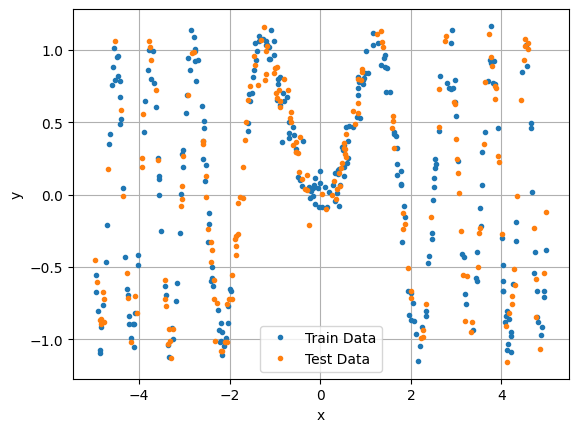

In [25]:
plt.plot(x_train[:,1], y_train, '.', label = "Train Data")
plt.plot(x_test[:,1], y_test, '.', label = "Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

(b) We will now consider the followingdataset(the formatting
 matches that of Datasets1-4, except $x^{(i)}$ is 1-dimensional): data/ds5_{train,valid,test}.csv

In src/p05b_lwr.py, implement locally weighted linear regression using the normal equations you derived in Part(a) and using 
$$
w^{(i)}=\exp{-\dfrac{||x^{(i)} - x||_2^2}{2\tau^2}}
$$
Train your model on the train split using $\tau=0.5$,then run your model on the valid split
and report the mean squared error (MSE).Finally plot your models predictions on the
validation set(plot the training set with blue x markers and the validation set with a red
o markers). Does the model seem to be under-or overfitting?


In [26]:
class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau, x, y):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        m_train, n_train = self.x.shape
        m_pred, n_pred = x.shape
        y_pred = np.zeros(m_pred)
        for i in range(m_pred):
            w = np.zeros(m_train)
            for j in range(m_train):
                w[j] = np.exp(-(self.x[j,:] - x[i,:]) @ (self.x[j,:] - x[i,:]).T/(2*self.tau**2))
            w_matrix = np.diag(w)
            theta = np.linalg.inv(self.x.T @ w_matrix @ self.x) @ self.x.T @ w_matrix @ self.y
            y_pred[i] = np.dot(x[i, :], theta)

        return y_pred

In [27]:
model = LocallyWeightedLinearRegression(tau=0.5, x=x_train, y=y_train)
model.fit(x_train, y_train)

The MSE over the train set has been 0.33


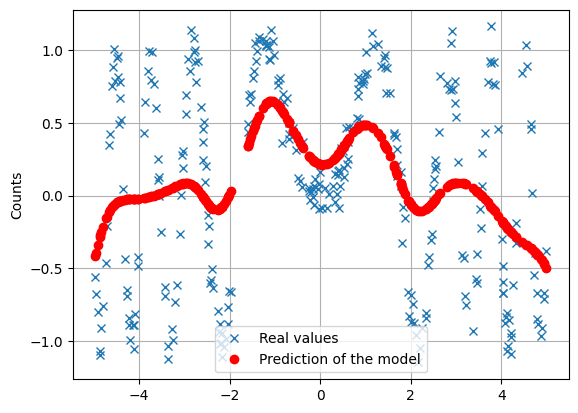

The MSE over the validation set has been 0.33


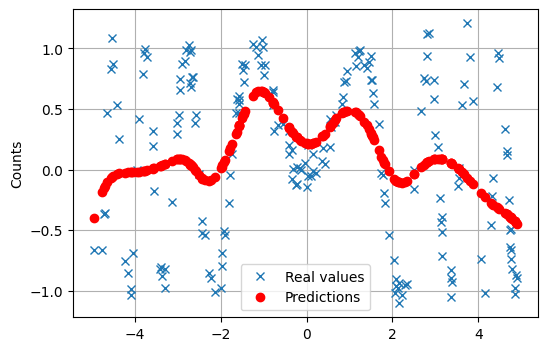

In [28]:
mse_train = np.mean((model.predict(x_train) - y_train)**2)
print(f"The MSE over the train set has been {mse_train:.2f}")
plt.plot(x_train[:,1], y_train, 'x', label = "Real values")
plt.plot(x_train[:,1], model.predict(x_train), 'o', c="red", label = "Prediction of the model")
plt.ylabel("Counts")
plt.legend()
plt.grid()
plt.show()

mse_valid = np.mean((model.predict(x_valid) - y_valid)**2)
print(f"The MSE over the validation set has been {mse_valid:.2f}")

y_pred = model.predict(x_valid)

plt.figure(figsize=(6,4))
plt.plot(x_valid[:,1], y_valid, 'x', label="Real values")
plt.plot(x_valid[:,1], y_pred, 'o', c="red", label="Predictions")
plt.ylabel("Counts")
plt.legend()
plt.grid()
plt.show()

The model is clearly underfitting.

 (c) [5 points] Coding problem. We will now tune the hyperparameter $\tau$. In src/p05c_tau.py,
 find the MSE value of your model on the validation set for each of the values of specified
 in the code. For each , plot your models predictions on the validation set in the format
 described in part (b). Report the value of which achieves the lowest MSE on the valid
 split, and finally report the MSE on the test split using this-value

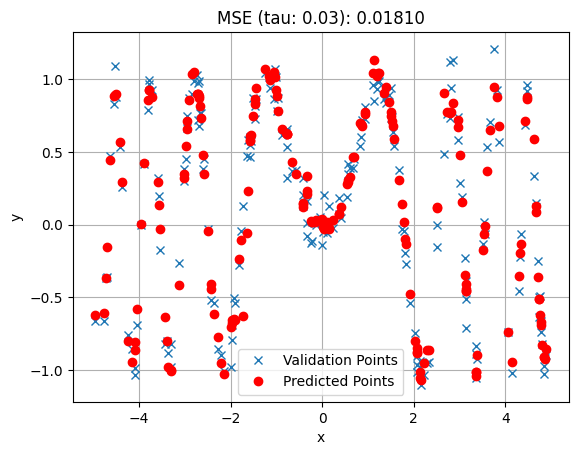

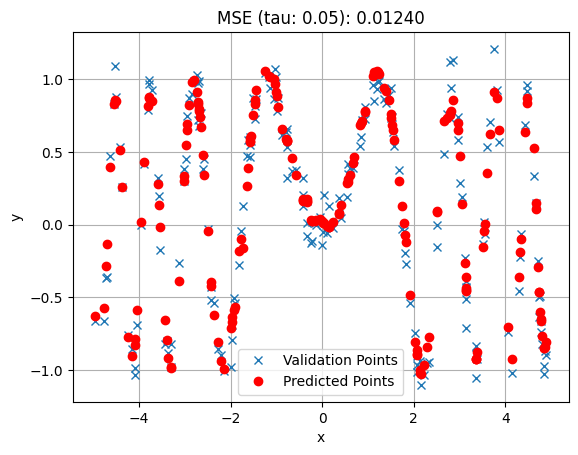

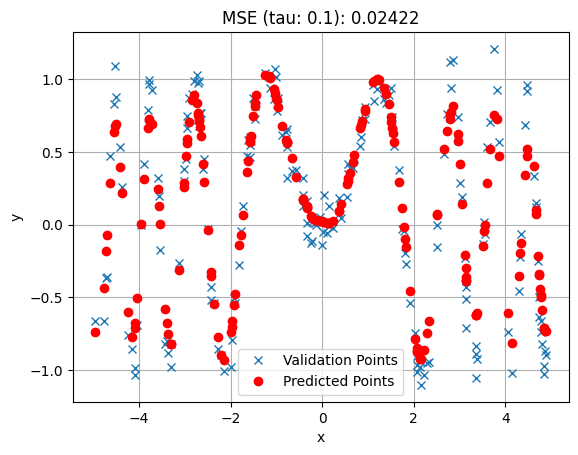

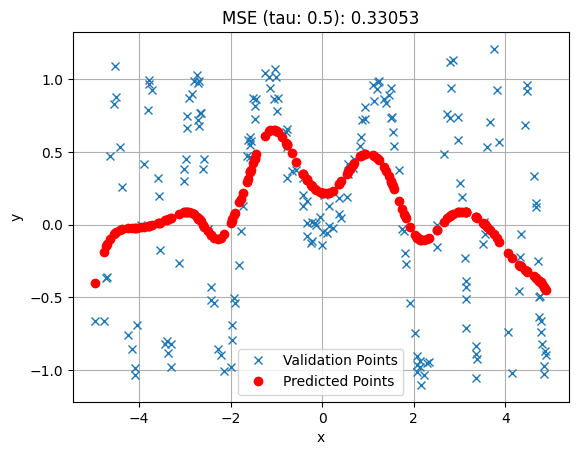

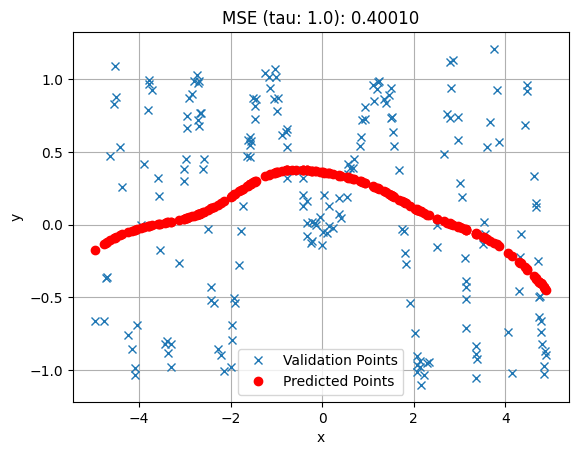

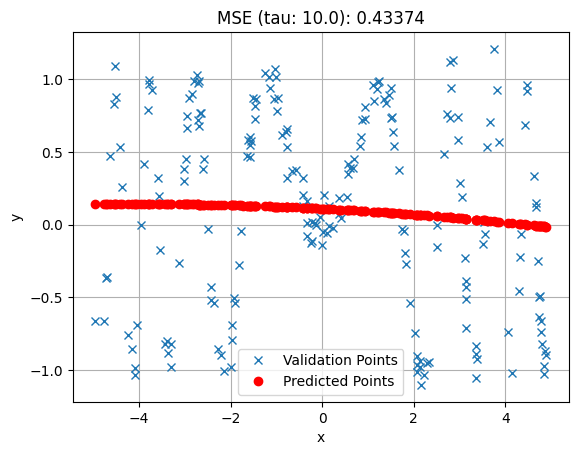

In [29]:
taus = [3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]
mse_dict = {}
for tau in taus:
    model = LocallyWeightedLinearRegression(tau=tau, x=x_train, y=y_train)
    model.fit(x_train, y_train)
    mse = np.mean((y_valid - model.predict(x_valid))**2)
    mse_dict[tau] = mse
    plt.plot(x_valid[:,1], y_valid, "x", label = "Validation Points")
    plt.plot(x_valid[:,1], model.predict(x_valid), "o", c = "red", label = "Predicted Points")
    plt.title(f"MSE (tau: {tau}): {mse:.5f}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()


We see the best MSE for validation set is obtained when $\tau=0.05$

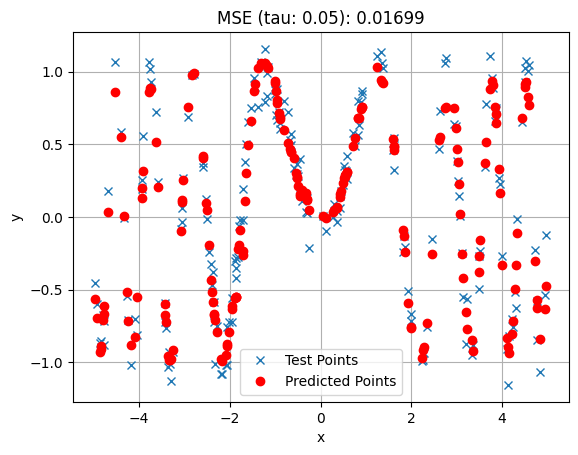

In [30]:

tau = 5e-2
model = LocallyWeightedLinearRegression(tau=tau, x=x_train, y=y_train)
model.fit(x_train, y_train)
mse = np.mean((y_test - model.predict(x_test))**2)
plt.plot(x_test[:,1], y_test, "x", label = "Test Points")
plt.plot(x_test[:,1], model.predict(x_test), "o", c = "red", label = "Predicted Points")
plt.title(f"MSE (tau: {tau}): {mse:.5f}")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()